# Proje 1 - Pandas ile Veri Analizi
* Aşağıda belirtilen soruların cevaplarını, ilgili boş hücrelere yazınız ve adı öğrenci numaranızdan oluşan nihai Jupyter Notebook (.ipynb) dosyasını, __09.06.2021 Çarşamba saat 18:00'e kadar__ EgeDers web sitesinde ilgili ders sayfasını kullanarak sisteme yükleyiniz. 
* Herhangi bir sorunuz olursa, EgeDers web sitesindeki ilgili ders sayfasında bu proje ile ilgili açılan forumu kullanınız.
* Çözümlerinizde döngüler yerine ```pandas``` kütüphanesinin kullanılması gerekmektedir.
* DataFrame'in gerekli sütunlarını elde edebilmek için (örn: anketteki 7. soru ile ilgili tüm sütunlar) "```filter```" metodunu kullanmanız önerilir.
* Çözümler arasında belirli bir oranın üstünde benzerlik tespit edildiğinde, bu çözümlerin notunda aynı oranda kesinti yapılacaktır veya bu çözümler sıfır alacaktır.

## Soru 1:
* Kaggle'in 2020 yılı için üyeleriyle yaptığı anket sonuçlarını içeren ekteki "kaggle_survey_2020_responses.csv" dosyasını 2. satırı atlayarak ```survey``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* Q1, Q2, Q3, Q4, Q5 ve Q6 sütun isimlerini sırasıyla Age, Gender, Country, Education, Occupation ve Coding Experience olacak şekilde değiştirin.
* Education, Occupation ve Coding Experience sütunlarından herhangi birisisinde ```NaN``` değeri olan satırları siliniz. Kaç satır silindi?
* En son oluşan DataFrame'in satır ve sütun sayısını yazdırın.

In [14]:
import pandas as pd

data = pd.read_csv(r"C:\Users\Pelin Seloğlu\Desktop\05160000048_Veri Bilimine Giriş_Vize\kaggle_survey_2020_responses.csv", skiprows = [1])
survey = pd.DataFrame(data)

survey.drop(['Time from Start to Finish (seconds)'], axis=1, inplace = True)

count_row = survey.shape[0]
count_col = survey.shape[1]

survey.rename(columns = {'Q1': 'Age', 'Q2': 'Gender', 'Q3': 'Country', 'Q4': 'Education', 'Q5': 'Occupation', 'Q6': 'Coding Experience'}, inplace = True)

survey.dropna(subset = ['Education','Occupation','Coding Experience'], inplace = True)
count_row_new = survey.shape[0]

count_remove = count_row - count_row_new

print("Education, Occpation ve Coding Experience da silinen toplam satır sayısı:",count_remove)

print("Dataframe'in Satır Sayısı:", count_row_new," Dataframe'in sütun sayısı:", count_col)

survey



Education, Occpation ve Coding Experience da silinen toplam satır sayısı: 916
Dataframe'in Satır Sayısı: 19120  Dataframe'in sütun sayısı: 354


,Age,Gender,Country,Education,Occupation,Coding Experience,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
1,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20029,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,NaN,NaN,SQL,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20032,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20033,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,C,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


## Soru 2:
Ankete katılanların yaş aralık dağılımını pasta grafiği ile gösteriniz.

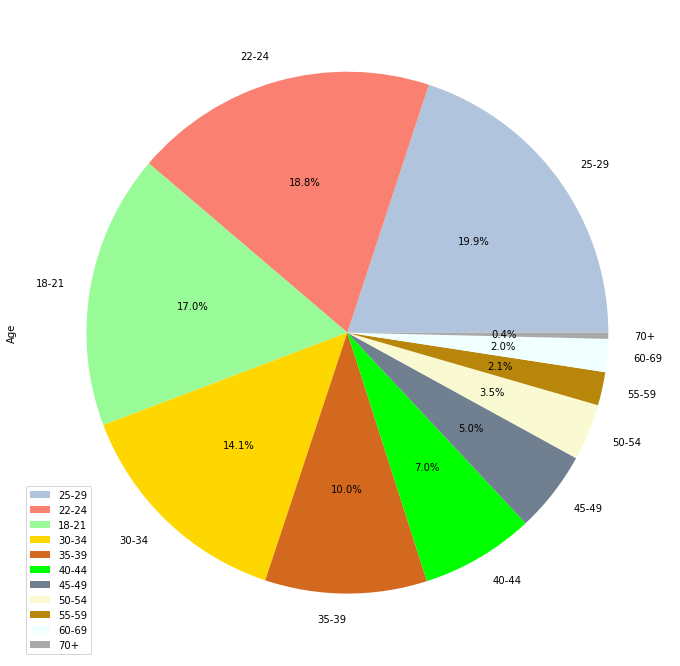

In [15]:
import random
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 11)
bin_percent = pd.DataFrame(survey["Age"].value_counts(normalize=True) * 100)

plot = bin_percent.plot.pie(y="Age",colors = colors, figsize=(12,12), autopct='%1.1f%%')
plt.show()

## Soru 3:
Türkiye'den ankete katılanların eğitim seviyelerine göre sayılarını listeleyiniz.

In [16]:
edu_lvl = survey.loc[survey["Country"] == "Turkey"]
edu_lvl.groupby(['Education']).size().reset_index(name='counts')

,Education,counts
0,Bachelor’s degree,129
1,Doctoral degree,50
2,I prefer not to answer,8
3,Master’s degree,111
4,No formal education past high school,3
5,Professional degree,6
6,Some college/university study without earning ...,15


## Soru 4:
Her bir yaş aralığı için en çok yapılan meslek ismini (```Occupation```) listeleyiniz.


In [17]:
age = survey.groupby(['Age','Occupation']).size()
age = age.loc[age.groupby(level=0).idxmax()].reset_index().drop(0, axis = 1)
age


,Age,Occupation
0,18-21,Student
1,22-24,Student
2,25-29,Student
3,30-34,Data Scientist
4,35-39,Data Scientist
5,40-44,Data Scientist
6,45-49,Other
7,50-54,Other
8,55-59,Other
9,60-69,Other


## Soru 5:
* Her bir programlama dilinin kaç anket katılımcısı tarafından kullanıldığını bulup büyükten küçüğe sıralayınız.
* Her bir programlama dilinin kaç ```Data Scientist``` tarafından kullanıldığını bulup büyükten küçüğe sıralayınız. 
* Her iki sonucu aynı figürde yan yana iki alt grafik (subplot) olarak gösteriniz. Grafiklere uygun birer başlık (```title```) atayınız.

Tüm anketörlerin kullandığı programlama dillerinin büyükten küçüğe sıralanması:
Python :  15530
SQL :  7535
R :  4277
C++ :  3827
Java :  3367
C :  3315
Javascript :  2995
MATLAB :  2217
Bash :  1776
Julia :  262
Swift :  198

Data Scientist olan anketörlerinin kullandığı programlama dillerinin büyükten küçüğe sıralanması: 
Python :  2453
SQL :  1473
R :  975
Bash :  405
C++ :  323
Java :  305
Javascript :  290
C :  247
MATLAB :  242
Julia :  71
Swift :  14


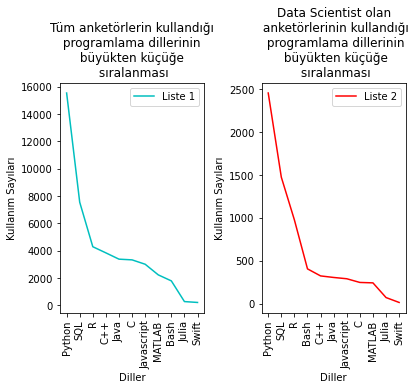

In [18]:
def takeSecond(a):
    return a[1]
def printList(lista):
    for x in lista:
        print(x[0], ': ', x[1])
        
#programlama dilerini kullanan kullanıcı sayısının belirlenmesi
c1 = len(survey[survey['Q7_Part_1'] == 'Python'])
c2 = len(survey[survey['Q7_Part_2'] == 'R'])
c3 = len(survey[survey['Q7_Part_3'] == 'SQL'])
c4 = len(survey[survey['Q7_Part_4'] == 'C'])
c5 = len(survey[survey['Q7_Part_5'] == 'C++'])
c6 = len(survey[survey['Q7_Part_6'] == 'Java'])
c7 = len(survey[survey['Q7_Part_7'] == 'Javascript'])
c8 = len(survey[survey['Q7_Part_8'] == 'Julia'])
c9 = len(survey[survey['Q7_Part_9'] == 'Swift'])
c10 = len(survey[survey['Q7_Part_10'] == 'Bash'])
c11 = len(survey[survey['Q7_Part_11'] == 'MATLAB'])

#data scientistlerin kullandığı programlama dillerinin sayılarının belirenmesi
dsc1 = len(survey[(survey['Q7_Part_1'] == 'Python') & (survey['Occupation'] == 'Data Scientist')])
dsc2 = len(survey[(survey['Q7_Part_2'] == 'R') & (survey['Occupation'] == 'Data Scientist')])
dsc3 = len(survey[(survey['Q7_Part_3'] == 'SQL') & (survey['Occupation'] == 'Data Scientist')])
dsc4 = len(survey[(survey['Q7_Part_4'] == 'C') & (survey['Occupation'] == 'Data Scientist')])
dsc5 = len(survey[(survey['Q7_Part_5'] == 'C++') & (survey['Occupation'] == 'Data Scientist')])
dsc6 = len(survey[(survey['Q7_Part_6'] == 'Java') & (survey['Occupation'] == 'Data Scientist')])
dsc7 = len(survey[(survey['Q7_Part_7'] == 'Javascript') & (survey['Occupation'] == 'Data Scientist')])
dsc8 = len(survey[(survey['Q7_Part_8'] == 'Julia') & (survey['Occupation'] == 'Data Scientist')])
dsc9 = len(survey[(survey['Q7_Part_9'] == 'Swift') & (survey['Occupation'] == 'Data Scientist')])
dsc10 = len(survey[(survey['Q7_Part_10'] == 'Bash') & (survey['Occupation'] == 'Data Scientist')])
dsc11 = len(survey[(survey['Q7_Part_11'] == 'MATLAB') & (survey['Occupation'] == 'Data Scientist')])

list1 = [('Python',c1),('R',c2),('SQL',c3),('C',c4),('C++',c5),('Java',c6),('Javascript',c7),('Julia',c8),('Swift',c9),('Bash',c10),('MATLAB',c11)]
list2 = [('Python',dsc1),('R',dsc2),('SQL',dsc3),('C',dsc4),('C++',dsc5),('Java',dsc6),('Javascript',dsc7),('Julia',dsc8),('Swift',dsc9),('Bash',dsc10),('MATLAB',dsc11)]

list1.sort(key=takeSecond,reverse=True)
list2.sort(key=takeSecond,reverse=True)

print('Tüm anketörlerin kullandığı programlama dillerinin büyükten küçüğe sıralanması:')
printList(list1)
print('\nData Scientist olan anketörlerinin kullandığı programlama dillerinin büyükten küçüğe sıralanması: ')
printList(list2)

#subplotların oluşturulması
x_data1 = []
y_data1 = []
for x in list1:
    y_data1.append(x[1])
    x_data1.append(x[0])

x_data2 = []
y_data2 = []
for x in list2:
    y_data2.append(x[1])
    x_data2.append(x[0])
    
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(x_data1, y_data1, label='Liste 1',color="c")
ax2.plot(x_data2, y_data2, label='Liste 2',color="r")

ax1.tick_params('x',labelrotation=90)
ax2.tick_params('x',labelrotation=90)

ax1.set_xlabel('Diller')
ax1.set_ylabel('Kullanım Sayıları')

ax1.set_title('Tüm anketörlerin kullandığı\n programlama dillerinin \n büyükten küçüğe \n sıralanması')
ax1.legend()

ax2.set_xlabel('Diller')
ax2.set_ylabel('Kullanım Sayıları')

ax2.set_title('Data Scientist olan\n anketörlerinin kullandığı\n programlama dillerinin\n büyükten küçüğe\n sıralanması')
ax2.legend()

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()


## Soru 6:
Yatay eksende kodlama deneyimi, dikey eksende makine öğrenmesi metotlarını kullanan ```Data Scientist``` sayısı olacak şekilde bir sütun grafiği çiziniz.

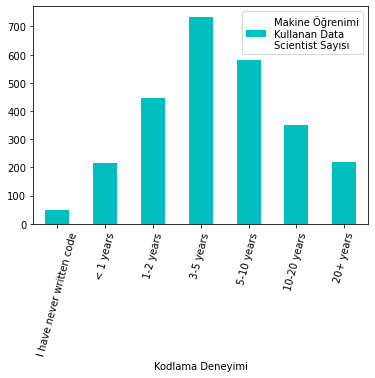

In [19]:
dsc1=len(survey[(survey['Q15'] != None)&(survey['Occupation']=='Data Scientist')&(survey['Coding Experience']=='I have never written code') &(survey['Q15'] != 'I do not use machine learning methods')])
dsc2=len(survey[(survey['Q15'] != None)&(survey['Occupation']=='Data Scientist')&(survey['Coding Experience']=='< 1 years')&(survey['Q15'] != 'I do not use machine learning methods')])
dsc3=len(survey[(survey['Q15'] != None)&(survey['Occupation']=='Data Scientist')&(survey['Coding Experience']=='1-2 years')&(survey['Q15'] != 'I do not use machine learning methods')])
dsc4=len(survey[(survey['Q15'] != None)&(survey['Occupation']=='Data Scientist')&(survey['Coding Experience']=='3-5 years')&(survey['Q15'] != 'I do not use machine learning methods')])
dsc5=len(survey[(survey['Q15'] != None)&(survey['Occupation']=='Data Scientist')&(survey['Coding Experience']=='5-10 years')&(survey['Q15'] != 'I do not use machine learning methods')])
dsc6=len(survey[(survey['Q15'] != None)&(survey['Occupation']=='Data Scientist')&(survey['Coding Experience']=='10-20 years')&(survey['Q15'] != 'I do not use machine learning methods')])
dsc7=len(survey[(survey['Q15'] != None)&(survey['Occupation']=='Data Scientist')&(survey['Coding Experience']=='20+ years')&(survey['Q15'] != 'I do not use machine learning methods')])

craft = pd.DataFrame({'Kodlama Deneyimi':['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years'], 'Makine Öğrenimi\nKullanan Data\nScientist Sayısı':[dsc1, dsc2, dsc3, dsc4, dsc5, dsc6, dsc7] })
plot_bar = craft.plot.bar(x='Kodlama Deneyimi', y='Makine Öğrenimi\nKullanan Data\nScientist Sayısı',rot=0, color="c")
plot_bar.tick_params(axis='x', labelrotation=75)


## Soru 7:
* Yalnızca scikit-learn framework'ünü kullananların kullandıkları makine öğrenmesi algoritmalarının kullanıcı sayılarını büyükten küçüğe listeleyiniz.
* Scikit-learn, tensorflow ve keras kütüphanelerini düzenli olarak kullanan kişi sayısı kaçtır?

In [20]:
def takeSecond(a):
    return a[1]

def printList(list_a):
    for x in list_a:
        print(x[0], ': ', x[1])

justScikit = survey[(survey['Q16_Part_1'] =='  Scikit-learn ') & (survey['Q16_Part_2'] != '  TensorFlow ') &
                    (survey['Q16_Part_3'] != ' Keras ') & (survey['Q16_Part_4'] != ' PyTorch ') &
                    (survey['Q16_Part_5'] != ' Fast.ai ') & (survey['Q16_Part_6'] != ' MXNet ') &
                    (survey['Q16_Part_7'] != ' Xgboost ') & (survey['Q16_Part_8'] != ' LightGBM ') &
                    (survey['Q16_Part_9'] != ' CatBoost ') & (survey['Q16_Part_10'] != ' Prophet ') &
                    (survey['Q16_Part_11'] != ' H2O 3 ') & (survey['Q16_Part_12'] != ' Caret ') &
                    (survey['Q16_Part_13'] != ' Tidymodels ') & (survey['Q16_Part_14'] != ' JAX ') &
                    (survey['Q16_Part_15'] != 'None') & (survey['Q16_OTHER'] !='Other')]

js1 = len(justScikit[justScikit['Q17_Part_1']=='Linear or Logistic Regression'])
js2 = len(justScikit[justScikit['Q17_Part_2']=='Decision Trees or Random Forests'])
js3 = len(justScikit[justScikit['Q17_Part_3']=='Gradient Boosting Machines (xgboost, lightgbm, etc)'])
js4 = len(justScikit[justScikit['Q17_Part_4']=='Bayesian Approaches'])
js5 = len(justScikit[justScikit['Q17_Part_5']=='Evolutionary Approaches'])
js6 = len(justScikit[justScikit['Q17_Part_6']=='Dense Neural Networks (MLPs, etc)'])
js7 = len(justScikit[justScikit['Q17_Part_7']=='Convolutional Neural Networks'])
js8 = len(justScikit[justScikit['Q17_Part_8']=='Generative Adversarial Networks'])
js9 = len(justScikit[justScikit['Q17_Part_9']=='Recurrent Neural Networks'])
js10 = len(justScikit[justScikit['Q17_Part_10']=='Transformer Networks (BERT, gpt-3, etc)'])
js11 = len(justScikit[justScikit['Q17_Part_11']=='None'])
jsOther = len(justScikit[justScikit['Q17_OTHER']=='Other'])

list1 = [('Linear or Logistic Regression', js1), ('Decision Trees or Random Forests', js2), ('Gradient Boosting Machines (xgboost, lightgbm, etc)', js3), ('Bayesian Approaches', js4), ('Evolutionary Approaches', js5), ('Dense Neural Networks (MLPs, etc)', js6), ('Convolutional Neural Networks', js7), ('Generative Adversarial Networks', js8), ('Recurrent Neural Networks', js9), ('Transformer Networks (BERT, gpt-3, etc)', js10), ('None', js11), ('Other', jsOther)]
list1.sort(key=takeSecond,reverse=True)
print('Sadece Scikit-learn framework ü kullanan kullanıcıların kullandıkları makine öğrenmesi\nalgoritmalarının kullanıcı sayılarına göre büyükten küçüğe sıralanması:\n')
printList(list1)

#Scikit-learn, tensorflow ve keras kütüphanelerini düzenli olarak kullanan kişi sayısının hesaplanması
dsc2 = len(survey[(survey['Q16_Part_1'] == '  Scikit-learn ') &
                  (survey['Q16_Part_2']  =='  TensorFlow ') &
                  (survey['Q16_Part_3']  ==' Keras ')])
print("\nScikit-learn, tensorflow ve keras kütüphanelerini düzenli olarak kullanan kişi sayısı:", dsc2)


Sadece Scikit-learn framework ü kullanan kullanıcıların kullandıkları makine öğrenmesi
algoritmalarının kullanıcı sayılarına göre büyükten küçüğe sıralanması:

Linear or Logistic Regression :  1683
Decision Trees or Random Forests :  1292
Bayesian Approaches :  428
Gradient Boosting Machines (xgboost, lightgbm, etc) :  295
Convolutional Neural Networks :  138
None :  105
Dense Neural Networks (MLPs, etc) :  68
Recurrent Neural Networks :  67
Other :  60
Evolutionary Approaches :  38
Transformer Networks (BERT, gpt-3, etc) :  20
Generative Adversarial Networks :  8

Scikit-learn, tensorflow ve keras kütüphanelerini düzenli olarak kullanan kişi sayısı: 4406


## Soru 8:
* Ortalama yıllık maaşı en yüksek olan meslek (```Occupation```) nedir? ```Data Scientist``` kaçıncı sıradadır? **Not:** Aralık olarak verilen maaşların orta noktasını maaş değeri olarak alıp ```ConvertedComp``` isimli yeni bir sütun ekleyiniz.
* ```Data Scientist``` olarak çalışanların ülke bazında ortalama yıllık maaşlarını büyükten küçüğe sıralayın, ilk 10 ülkeyi ve bu ülkelerdeki ortalama yıllık ```Data Scientist``` maaşlarını listeleyin.
* 250’den fazla kişi çalışan kurumdakilerin ortalama maaşları ne kadardır?
* Hesaplanan maaş (```ConvertedComp```) sütununu kullanarak ülke bazlı ortalama, standart sapma ve medyan değerlerinden oluşan bir dataframe oluşturun ve listeleyin. Türkiye kaçıncı sıradadır ve değeri kaçtır?

In [21]:
#verilerin düzeltilmesi
survey['Q24'] = survey['Q24'].str.replace('$', '')
survey['Q24'] = survey['Q24'].str.replace('.', '')
survey['Q24'] = survey['Q24'].str.replace(',', '')
survey['Q24'] = survey['Q24'].str.replace('> ', '500000-')

BeforeSymbol = survey['Q24'].str.split('-').str[0].astype(float)
AfterSymbol = survey['Q24'].str.split('-').str[1].astype(float)
survey['ConvertedComp'] = (AfterSymbol + BeforeSymbol)/2
 
#Ortalama yıllık maaşı en yüksek olan meslek ve data scientistin sırası
a = survey[['Occupation', 'ConvertedComp']]
a=a.dropna()
ort1=a.groupby(['Occupation']).mean().sort_values(by='ConvertedComp', ascending=False).nlargest(1, 'ConvertedComp')
dtsc=a.groupby(['Occupation']).mean().sort_values(by='ConvertedComp', ascending=False)
print("Ortalama yıllık maaşı en yüksek olan meslek:\n", ort1)
print("\nData Scientistlerin sırası:"+ str(list(dtsc.index).index('Data Scientist')+1))

#Data Scientist olarak çalışanların ülke bazında ortalama yıllık maaşlarını büyükten küçüğe sıralanması, ilk 10 ülke ve ortalamaları
dataS = survey.loc[survey['Occupation'] == 'Data Scientist']
b = dataS[['Country','ConvertedComp']]
ort2 = b.groupby(['Country']).mean().sort_values(by='ConvertedComp', ascending=False).nlargest(10, 'ConvertedComp')
print("\nÜlkelerin ortalama Data Scientist maaşlarına göre büyükten\nküçüğe sıralanması ile elde edilen ilk 10 ülke:\n", ort2)

#250’den fazla kişi çalışan kurumdakilerin ortalama maaşları
companydata = survey.loc[(survey['Q20'] =='10,000 or more employees') |
                         (survey['Q20'] == '250-999 employees') |
                         (survey['Q20'] == '1000-9,999 employees')]
ort3 = companydata.mean()
print("\n250’den fazla kişi çalışan kurumdakilerin ortalama maaşları: \n", ort3)

#ortalama, standart sapma ve medyan ile yeni dataframe oluşturma
df1 = survey.groupby(['Country']).std().reset_index()
df1 = df1.rename(columns={'ConvertedComp': 'Standart Sapma'})

df2 = survey.groupby(['Country']).mean().reset_index()
df2 = df2.rename(columns = {'ConvertedComp': 'Ortalama'})

df3 = survey.groupby(['Country']).median().reset_index()
df3 = df3.rename(columns = {'ConvertedComp' : 'Medyan'})

df4 = pd.merge(df1, df2, on=["Country"])
son = pd.merge(df3, df4, on = ['Country'])

#son oluşturulan dataframe i sıralama ve index i bir arttırma işlemi
son=son.sort_values(by='Ortalama', ascending=False).reset_index()
son.index +=1
son.drop(['index'], axis=1, inplace = True)
#oluşturulan yeni dataframe'den Türkiye'yi ve onun değerlerini bulma
tr = son.loc[son['Country'] == 'Turkey']
print('\nBizim ülkemizin son oluşturulan dataframedeki yeri ve değerleri:\n',tr)
son



Ortalama yıllık maaşı en yüksek olan meslek:
                          ConvertedComp
Occupation                            
Product/Project Manager   62362.216949

Data Scientistlerin sırası:2

Ülkelerin ortalama Data Scientist maaşlarına göre büyükten
küçüğe sıralanması ile elde edilen ilk 10 ülke:
                                                     ConvertedComp
Country                                                          
United States of America                            142609.330110
Israel                                              111979.520000
Switzerland                                         109230.269231
Australia                                           104318.958333
United Kingdom of Great Britain and Northern Ir...   89749.504587
Germany                                              79804.195312
Ireland                                              78499.500000
Singapore                                            76937.000000
Canada                                

,Country,Medyan,Standart Sapma,Ortalama
1,United States of America,112499.5,85088.163171,120321.619272
2,Switzerland,112499.5,54795.290175,120051.583333
3,Israel,94999.5,101749.997198,109757.328125
4,Australia,84999.5,70029.059912,87807.329932
5,United Kingdom of Great Britain and Northern I...,64999.5,77980.660312,82429.511429
6,Germany,64999.5,64869.140664,73634.271484
7,Canada,74999.5,55076.938245,73563.896465
8,Netherlands,64999.5,38504.894831,70603.482301
9,United Arab Emirates,64999.5,57151.792062,65777.277778
10,Sweden,54999.5,33930.786528,60767.681818


## Soru 9:
Lisans, yüksek lisans ve doktora mezunlarına ilişkin (ayrı ayrı); yatay eksende kodlama deneyimi (artan sırada olmalıdır), dikey eksende ortalama maaş bilgisi olacak şekilde tek bir çizgi grafiği çiziniz.

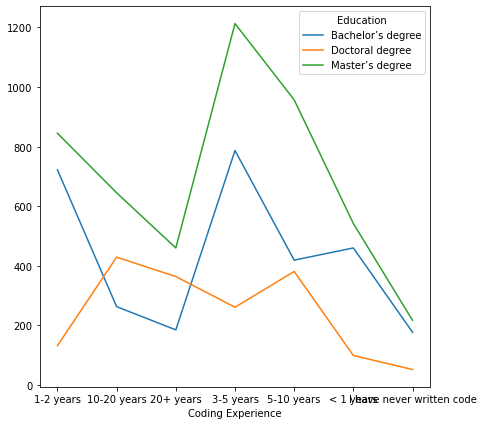

In [22]:
top = survey.loc[(survey['Education'] == 'Bachelor’s degree')|(survey['Education'] == 'Doctoral degree')|(survey['Education'] == 'Master’s degree')]
top.groupby(['Coding Experience','Education']).count()['ConvertedComp'].unstack().plot(figsize=(7,7))


## Soru 10:
* Mesleklerdeki (```Occupation```) cinsiyet dağılımını, yatay yığılmış "stacked" sütun grafik olarak gösteriniz.
* Her meslek (```Occupation```) için kadın oranını bulup büyükten küçüğe sıralayınız.
* Şu anda çalışmayan kadın ve erkek oranlarını listeleyiniz.

Çalışmayan kadın oranı: 0.1014
Çalışmayan erkek oranı: 0.0815

Anketörler arasındaki kadınların mesleklerdeki oranlarının büyükten küçüğe sıralanması:


,Occupation,0
0,Student,0.334783
1,Data Scientist,0.118750
2,Currently not employed,0.101359
3,Data Analyst,0.093207
4,Other,0.078533
5,Software Engineer,0.070652
6,Research Scientist,0.064402
7,Business Analyst,0.041304
8,Machine Learning Engineer,0.036685
9,Product/Project Manager,0.021196


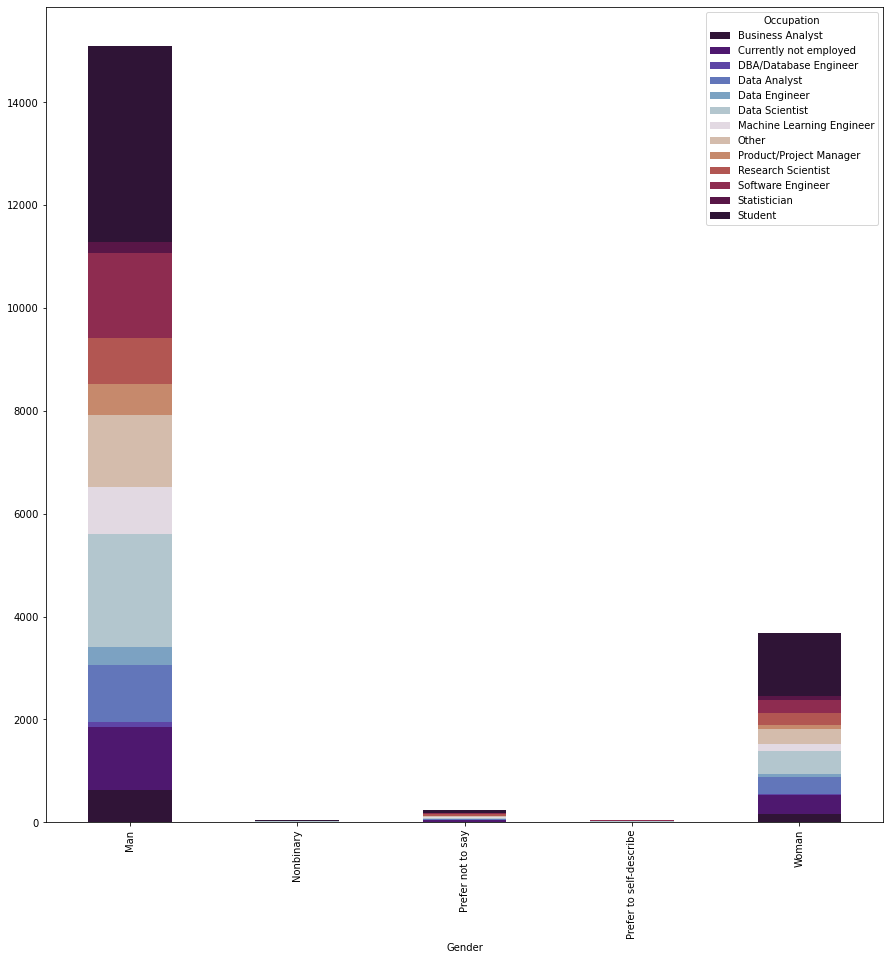

In [23]:
#stacked gafiği gösterimi
craft = pd.crosstab(index = survey['Gender'], columns = survey['Occupation'])
craft.plot(kind = 'bar', stacked = True, figsize=(15,15),colormap="twilight_shifted")

#Çalışmayan kadın erkek oranlarının hesaplanması
survey['Occupation'].dropna()#bu ve altındakine bak
survey['Gender'].dropna()
gender = survey.loc[survey["Gender"] == "Woman"]
gender1 = survey.loc[survey["Gender"] == "Man"]

top_man = len(survey[survey['Gender'] == 'Man'])
top_woman = len(survey[survey['Gender'] == 'Woman'])

unemployed_man =len(gender1[gender1['Occupation'] == 'Currently not employed'])
unemployed_woman = len(gender[gender['Occupation'] == 'Currently not employed'])

oran_w = unemployed_woman/top_woman
oran_m = unemployed_man/top_man
print("Çalışmayan kadın oranı: %.4f\nÇalışmayan erkek oranı: %.4f" % (oran_w,oran_m))

#Mesleklerde yer alan kadın sayısının hesaplanması
print('\nAnketörler arasındaki kadınların mesleklerdeki oranlarının büyükten küçüğe sıralanması:')
gender_woman = gender.groupby(['Occupation']).size()
gender_woman = gender_woman.transform(lambda x: (x/top_woman)).sort_values(ascending=False).reset_index()
gender_woman

## Soru 11:

Ankete katılan kadınlardan ortalama çalışma süresi 3 yılın üzerinde olanlar için:
* Kadın katılımcı sayısının en yüksek olduğu ülke hangisidir?
* Türkiye'den ankete katılan kadınların eğitim durumlarını pasta grafiğinde gösteriniz.

Kadın katılımcı sayısının en yüksek olduğu Country
India    480
dtype: int64

Türkiye'den ankete katılan kadınların eğitim durumları


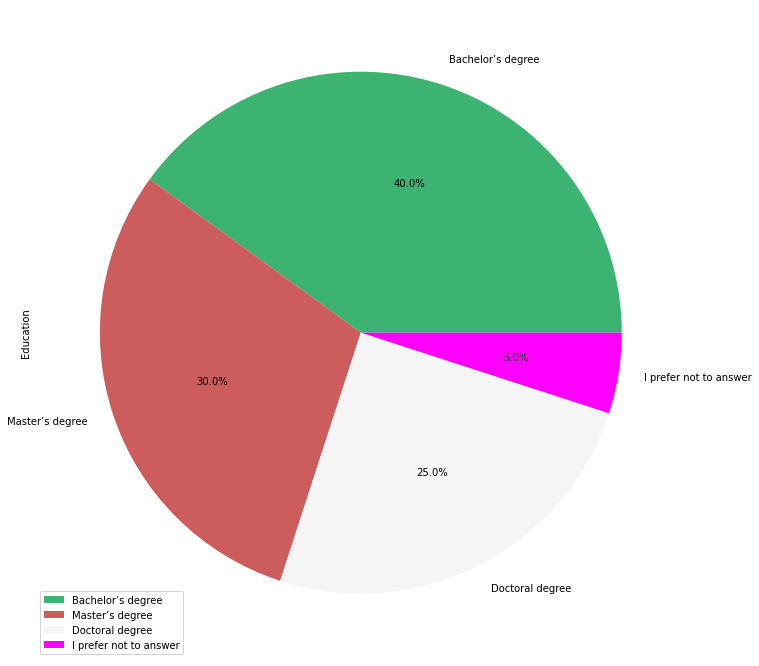

In [24]:
gender = survey.loc[survey["Gender"] == "Woman"]
new_gender = gender.loc[(gender['Coding Experience'] == '3-5 years') 
                        | (gender['Coding Experience'] == '5-10 years') 
                        | (gender['Coding Experience'] == '10-20 years') 
                        | (gender['Coding Experience'] == '20+ years')]

max_country = new_gender.groupby('Country').size().sort_values(ascending=False).head(1)
print("Kadın katılımcı sayısının en yüksek olduğu",max_country)

turkey = new_gender.loc[new_gender['Country'] == 'Turkey']

print("\nTürkiye'den ankete katılan kadınların eğitim durumları")
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 11)
bin_percent = pd.DataFrame(turkey['Education'].value_counts(normalize=True) * 100)
plot = bin_percent.plot.pie(y="Education",colors = colors, figsize=(12,12), autopct='%1.1f%%')

plt.show()

## Soru 12:
* 39. soru ile ilgili sütunlarda yer alan değerlerdeki parantez içi ifadeleri siliniz.
* 18-21 yaş aralığında olan katılımcıların favori sosyal medya platformu nedir?

In [25]:
def takeSecond(a):
    return a[1]
#ilgili sütunlardaki parantez içi değerlerin silinmesi       
survey["Q39_Part_1"] = survey["Q39_Part_1"].str.replace(r"\(.*\)","")
survey["Q39_Part_2"] = survey["Q39_Part_2"].str.replace(r"\(.*\)","")
survey["Q39_Part_3"] = survey["Q39_Part_3"].str.replace(r"\(.*\)","")
survey["Q39_Part_4"] = survey["Q39_Part_4"].str.replace(r"\(.*\)","")
survey["Q39_Part_5"] = survey["Q39_Part_5"].str.replace(r"\(.*\)","")
survey["Q39_Part_6"] = survey["Q39_Part_6"].str.replace(r"\(.*\)","")
survey["Q39_Part_7"] = survey["Q39_Part_7"].str.replace(r"\(.*\)","")
survey["Q39_Part_8"] = survey["Q39_Part_8"].str.replace(r"\(.*\)","")
survey["Q39_Part_9"] = survey["Q39_Part_9"].str.replace(r"\(.*\)","")
survey["Q39_Part_10"] = survey["Q39_Part_10"].str.replace(r"\(.*\)","")
survey["Q39_Part_11"] = survey["Q39_Part_11"].str.replace(r"\(.*\)","")
survey["Q39_OTHER"] = survey["Q39_OTHER"].str.replace(r"\(.*\)","")

age = survey.loc[survey['Age'] == '18-21']

#18-21 yaş kullanıcılarının kullandığı sosyal medyalarının sayılması
q1=age["Q39_Part_1"].count()
q2=age["Q39_Part_2"].count()
q3=age["Q39_Part_3"].count()
q4=age["Q39_Part_4"].count()
q5=age["Q39_Part_5"].count()
q6=age["Q39_Part_6"].count()
q7=age["Q39_Part_7"].count()
q8=age["Q39_Part_8"].count()
q9=age["Q39_Part_9"].count()
q10=age["Q39_Part_10"].count()
q11=age["Q39_Part_11"].count()
qther=age["Q39_OTHER"].count()

list1 = [("Twitter",q1),('Email newsletters ',q2),('Reddit',q3),('Kaggle',q4),('Course Forums',q5),('YouTube',q6),('Podcasts',q7),('Blogs',q8),('Journal Publications',q9),('Slack Communities',q10),('None',q11),('Other',qther)]
list1.sort(key=takeSecond,reverse=True)
print("18-21 yaş aralığında olan katılımcıların favori sosyal medya platformu:",list1[0][0])


18-21 yaş aralığında olan katılımcıların favori sosyal medya platformu: Kaggle


## Soru 13:
* https://download.geonames.org/export/dump/countryInfo.txt adresindeki veriyi:
    * ilk 49 satırını ihmal ederek
    * yalnızca ```#ISO, Country, neighbours``` sütunlarını kullanarak 
    * ```Country``` sütununu indeks sütun olarak  
    
okuyarak __country_info__ adlı DataFrame'e aktarınız.
* ```#ISO``` sütununun ismini ```Country Code``` olarak değiştiriniz.
* ```survey``` ve ```country_info``` adlı DataFrame'leri ülke bazında birleştirip ```merged_survey``` adında yeni bir dataframe'e aktarınız.

In [26]:
data1 = pd.read_csv("https://download.geonames.org/export/dump/countryInfo.txt", sep='\t', skiprows = 49, usecols = ["#ISO","Country","neighbours"])
country_info = pd.DataFrame(data1)
country_info = country_info.set_index("Country")
country_info = country_info.rename(columns ={"#ISO" : "Country Code"})
merged_survey = pd.merge(survey, country_info, on=["Country"])
merged_survey

,Age,Gender,Country,Education,Occupation,Coding Experience,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,ConvertedComp,Country Code,neighbours
0,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,...,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CO,"EC,PE,PA,BR,VE"
1,55-59,Man,Colombia,Master’s degree,Data Scientist,10-20 years,Python,R,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Other,44999.5,CO,"EC,PE,PA,BR,VE"
2,18-21,Man,Colombia,Some college/university study without earning ...,Student,< 1 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CO,"EC,PE,PA,BR,VE"
3,25-29,Man,Colombia,Professional degree,Data Analyst,5-10 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,None,NaN,12499.5,CO,"EC,PE,PA,BR,VE"
4,45-49,Man,Colombia,Master’s degree,Business Analyst,< 1 years,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None,NaN,44999.5,CO,"EC,PE,PA,BR,VE"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14788,22-24,Man,Sri Lanka,Bachelor’s degree,Student,1-2 years,Python,NaN,NaN,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LK,NaN
14789,22-24,Man,Sri Lanka,Bachelor’s degree,Student,1-2 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,LK,NaN
14790,22-24,Man,Sri Lanka,Bachelor’s degree,Student,< 1 years,Python,R,NaN,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LK,NaN
14791,22-24,Woman,Sri Lanka,Bachelor’s degree,Student,1-2 years,Python,NaN,SQL,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LK,NaN


## Soru 14:
Almanya ve komşu ülkeleri için ankete katılanlardan doktoralıların ülke bazında yüzdelerini, ülke isimlerine göre alfabetik sırada listeleyiniz.

In [27]:
oran_listesi = [['Austria',len(merged_survey[(merged_survey['Country Code'] ==  'AT') & (merged_survey['Education'] == 'Doctoral degree')]) / len(merged_survey['Country Code'] ==  'AT')],
                ['Belgium', len(merged_survey[(merged_survey['Country Code'] ==  'BE') & (merged_survey['Education'] == 'Doctoral degree')]) / len(merged_survey['Country Code'] ==  'BE')], 
                ['Czechia',len(merged_survey[(merged_survey['Country Code'] == 'CZ') & (merged_survey['Education']=='Doctoral degree')])/len(merged_survey['Country Code'] == 'CZ')],
                ['Denmark',len(merged_survey[(merged_survey['Country Code'] == 'DK') & (merged_survey['Education']=='Doctoral degree')])/len(merged_survey['Country Code'] == 'DK')],
                ['France',len(merged_survey[(merged_survey['Country Code'] == 'FR') & (merged_survey['Education']=='Doctoral degree')])/len(merged_survey['Country Code'] == 'FR')],
                ['Germany',len(merged_survey[(merged_survey['Country Code'] == 'DE') & (merged_survey['Education']=='Doctoral degree')])/len(merged_survey['Country Code'] == 'DE')],
                ['Luxembourg',len(merged_survey[(merged_survey['Country Code'] == 'LU') & (merged_survey['Education']=='Doctoral degree')])/len(merged_survey['Country Code'] == 'LU')],
                ['Netherlands',len(merged_survey[(merged_survey['Country Code'] == 'NL') & (merged_survey['Education']=='Doctoral degree')])/len(merged_survey['Country Code'] == 'NL')],
                ['Poland',len(merged_survey[(merged_survey['Country Code'] == 'PL') & (merged_survey['Education']=='Doctoral degree')])/len(merged_survey['Country Code'] == 'PL')],
                ['Switzerland',len(merged_survey[(merged_survey['Country Code'] == 'CH') & (merged_survey['Education']=='Doctoral degree')])/len(merged_survey['Country Code'] == 'CH')]]

oran = pd.DataFrame(oran_listesi, columns=['County', 'Oran'])
oran = oran.set_index('County')
oran

,Oran
County,
Austria,0.000000
Belgium,0.000879
Czechia,0.000000
Denmark,0.000000
France,0.005070
Germany,0.006692
Luxembourg,0.000000
Netherlands,0.001555
Poland,0.001487
